# This script 
=> loads preprocessed training data 

=> splits it into training and validation sets 

=> compiles UNet, UNet++, and ResNet models using the Adam optimizer with a binary cross-entropy loss function 

=> trains each model for a specified number of epochs 

=> ModelCheckpoint callbacks are used to save the best-performing models based on validation accuracy during training

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt

# Load preprocessed data

In [2]:

X_train = np.load(r'path\X_train.npy')
y_train = np.load(r'path\y_train.npy')
X_val = np.load(r'path\X_val.npy')
y_val = np.load(r'path\y_val.npy')
X_test = np.load(r'path\X_test.npy')
y_test = np.load(r'path\y_test.npy')

# Load or define the UNet model

In [3]:

model = load_model(r'path_to_unet_model.keras')

# Compile the model

In [4]:

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [5]:

history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 703s 151s/step - accuracy: 0.5367 - loss: 0.6873 - val_accuracy: 1.0000 - val_loss: 0.6467
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 569s 140s/step - accuracy: 1.0000 - loss: 0.6238 - val_accuracy: 1.0000 - val_loss: 0.5916
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 628s 160s/step - accuracy: 1.0000 - loss: 0.5558 - val_accuracy: 1.0000 - val_loss: 0.5206
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 528s 122s/step - accuracy: 1.0000 - loss: 0.4649 - val_accuracy: 1.0000 - val_loss: 0.4201
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 596s 137s/step - accuracy: 1.0000 - loss: 0.3528 - val_accuracy: 1.0000 - val_loss: 0.2953


# Save the trained model

In [12]:

model.save('trained_model.keras')

# Get training and validation loss from the history object

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss

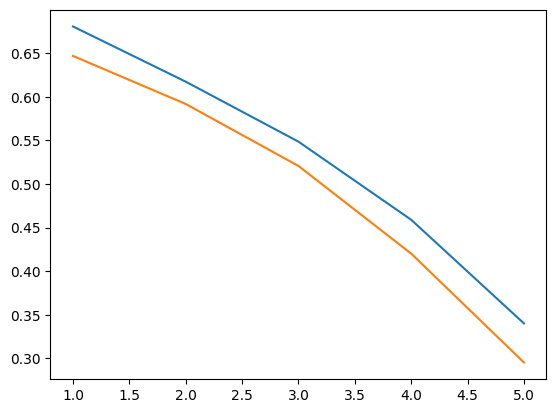

In [14]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')